# EDA of factors affecting Employee Attrition in the Dawn of Recession

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

This dataset has been referenced from Kaggle.

https://www.kaggle.com/c/summeranalytics2020/data

# About Dataset

The dataset has been picked up from Kaggle competition.

The dataset is about Employee Attrition, give the past history of employee.

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.



## Data Preparation and Cleaning


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno

import seaborn as sns
sns.set_style('darkgrid')


%matplotlib inline

In [5]:
#command to install missing no
#!pip install missingno

In [6]:
#import data set
df=pd.read_csv('train.csv')

In [7]:
df.head(5)

Id  Age  Attrition BusinessTravel              Department  \
0   1   30          0     Non-Travel  Research & Development   
1   2   36          0  Travel_Rarely  Research & Development   
2   3   55          1  Travel_Rarely                   Sales   
3   4   39          0  Travel_Rarely  Research & Development   
4   5   37          0  Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 2          3        Medical             571   
1                12          4  Life Sciences            1614   
2                 2          1        Medical             842   
3                24          1  Life Sciences            2014   
4                 3          3          Other             689   

   EnvironmentSatisfaction  ... PerformanceRating  StockOptionLevel  \
0                        3  ...                 3                 0   
1                        3  ...                 3                 2   
2                        3  ...                 3                 0   
3                        1  ...                 3                 0   
4                        3  ...                 3                 1   

  TotalWorkingYears  TrainingTimesLastYear YearsAtCompany  YearsInCurrentRole  \
0                12                      2             11                   7   
1                 7                      2              3                   2   
2                12                      3              9                   7   
3                18                      2              7                   7   
4                10                      2             10                   7   

   YearsSinceLastPromotion YearsWithCurrManager  CommunicationSkill  Behaviour  
0                        6                    7                   4          1  
1                        1                    1                   2          1  
2                        7                    3                   5          1  
3                        1                    7                   4          1  
4                        7                    8                   1          1  

[5 rows x 29 columns]

In [13]:
print(df.shape)

(1628, 29)


Total 1628 rows and 29 columns

In [11]:
df.iloc[:,:14].describe()

Id          Age    Attrition  DistanceFromHome    Education  \
count  1628.000000  1628.000000  1628.000000       1628.000000  1628.000000   
mean    814.500000    35.645577     0.482187          9.735258     2.884521   
std     470.107435     9.481794     0.499836          8.306546     1.020470   
min       1.000000    18.000000     0.000000          1.000000     1.000000   
25%     407.750000    29.000000     0.000000          2.000000     2.000000   
50%     814.500000    34.000000     0.000000          8.000000     3.000000   
75%    1221.250000    42.000000     1.000000         15.000000     4.000000   
max    1628.000000    60.000000     1.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  \
count     1628.000000              1628.000000     1628.000000   
mean      1000.985872                 2.646192        2.650491   
std        585.417694                 1.125283        0.736330   
min          1.000000                 1.000000        1.000000   
25%        509.250000                 2.000000        2.000000   
50%        977.000000                 3.000000        3.000000   
75%       1494.000000                 4.000000        3.000000   
max       2068.000000                 4.000000        4.000000   

       JobSatisfaction  
count      1628.000000  
mean          2.639435  
std           1.096272  
min           1.000000  
25%           2.000000  
50%           3.000000  
75%           4.000000  
max           4.000000

In [12]:
df.iloc[:,14:].describe()

MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count    1628.000000         1628.000000        1628.000000   
mean     5785.524570            2.761671          15.207617   
std      4339.293147            2.549995           3.686703   
min      1009.000000            0.000000          11.000000   
25%      2625.000000            1.000000          12.000000   
50%      4304.000000            2.000000          14.000000   
75%      7124.250000            4.000000          18.000000   
max     19999.000000            9.000000          25.000000   

       PerformanceRating  StockOptionLevel  TotalWorkingYears  \
count        1628.000000       1628.000000        1628.000000   
mean            3.155405          0.692260           9.949017   
std             0.362402          0.864808           7.482936   
min             3.000000          0.000000           0.000000   
25%             3.000000          0.000000           5.000000   
50%             3.000000          0.000000           8.000000   
75%             3.000000          1.000000          13.000000   
max             4.000000          3.000000          38.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count            1628.000000     1628.000000         1628.000000   
mean                2.752457        6.092752            3.614865   
std                 1.288033        5.921168            3.481051   
min                 0.000000        0.000000            0.000000   
25%                 2.000000        2.000000            1.000000   
50%                 3.000000        5.000000            2.000000   
75%                 3.000000        8.000000            7.000000   
max                 6.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  CommunicationSkill  \
count              1628.000000           1628.000000         1628.000000   
mean                  2.049140              3.551597            3.135749   
std                   3.138287              3.494369            1.408770   
min                   0.000000              0.000000            1.000000   
25%                   0.000000              0.000000            2.000000   
50%                   1.000000              2.000000            3.000000   
75%                   2.000000              7.000000            4.000000   
max                  15.000000             17.000000            5.000000   

       Behaviour  
count     1628.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0

Findings:
    
Columns of no use: ID
    
Columns which are close to normal disribution and have no skewness: Age,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,PerformanceRating,TrainingTimesLastYear,CommunicationSkill
                                                                

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [14]:
missingno.matrix(df.iloc[:,:13])

<AxesSubplot:>

<AxesSubplot:>

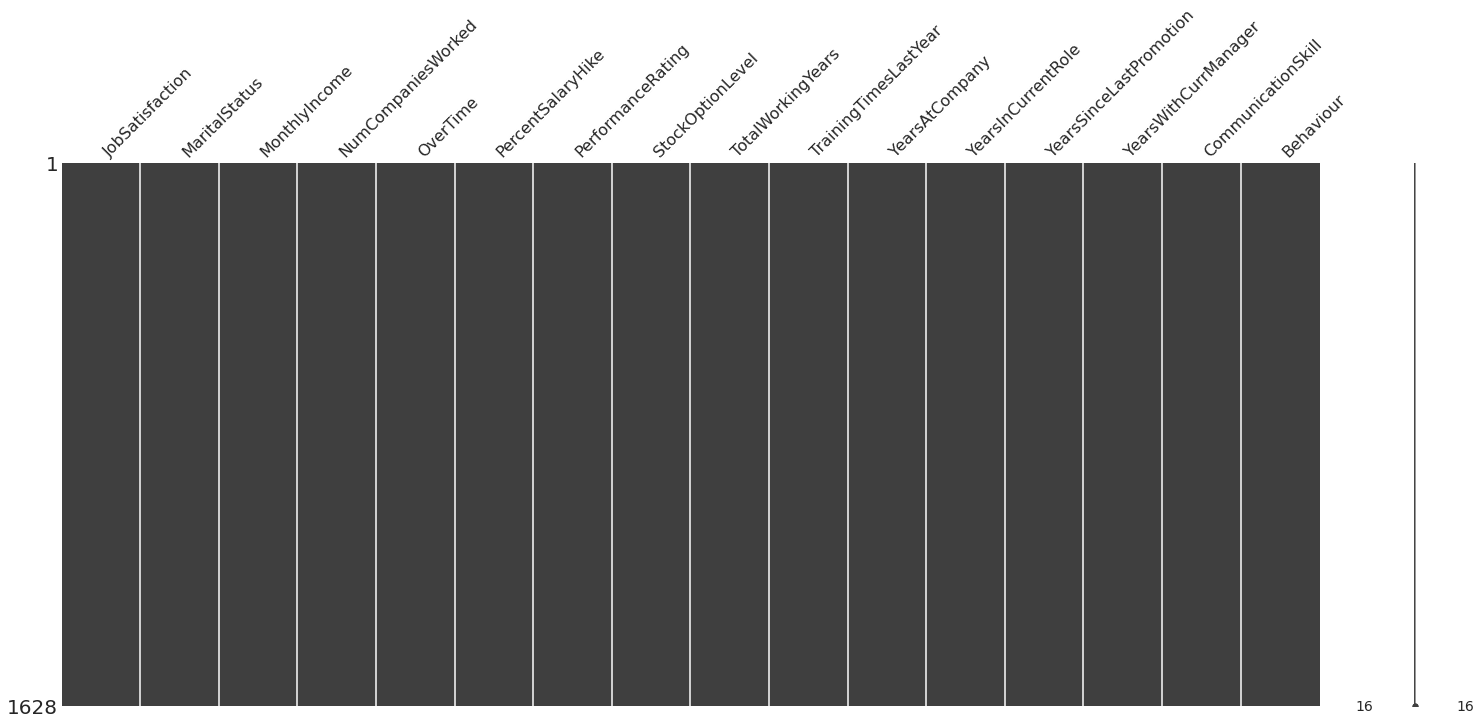

In [15]:
missingno.matrix(df.iloc[:,13:])

Missingno package, is useful in visualizing the misisng values in our dataset and also reveals how missing value in 1 column affect missing value in other columns

From the above visualization we can deduce that there is no null or misisng data in our data set

In [14]:
categorical_columns_list,numerical_columns_list=[],[]
for col in df.columns:
    if df[col].dtype=="object":
        categorical_columns_list.append(col)
    else:
        numerical_columns_list.append(col)

In [15]:
print("categorcial columns:")
print(categorical_columns_list)
print('\n')
print("numerical columns:")
print(numerical_columns_list)

categorcial columns:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


numerical columns:
['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill', 'Behaviour']


In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chetanrane72/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chetanrane72/zerotopandas-course-project-starter


'https://jovian.ml/chetanrane72/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization


In [20]:
for col in categorical_columns_list:
    print('Unique value counts in column {}'.format(col))
    print(df[col].value_counts())
    print('\n')

Unique value counts in column BusinessTravel
Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64


Unique value counts in column Department
Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64


Unique value counts in column EducationField
Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64


Unique value counts in column Gender
Male      996
Female    632
Name: Gender, dtype: int64


Unique value counts in column JobRole
Sales Executive              365
Research Scientist           341
Laboratory Technician        310
Sales Representative         172
Manufacturing Director       121
Healthcare Representative    110
Manager                       90
Human Resources               72
Research Director             47
Name: JobRole, dtype:

<ipython-input-99-9f6bcbb66bc6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-99-9f6bcbb66bc6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-99-9f6bcbb66bc6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-99-9f6bcbb66bc6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-99-9f6bcbb66bc6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-99-9f6bcbb66bc6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_x

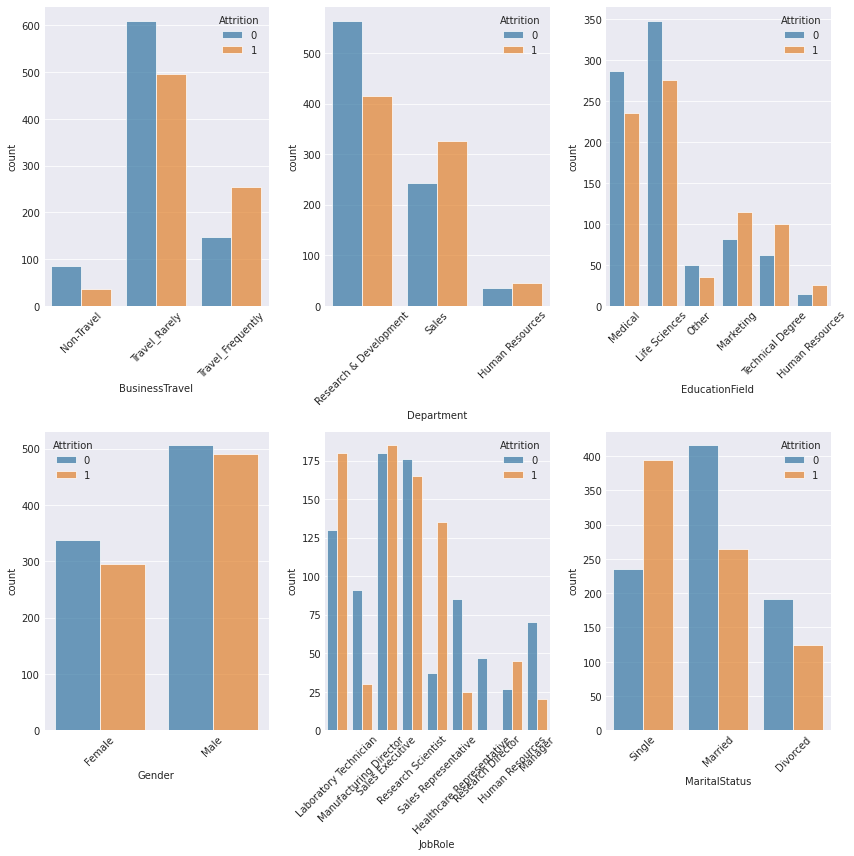

In [99]:
data_count=pd.concat([df[categorical_columns_list],df['Attrition']],axis=1)
fig, axes = plt.subplots(round((len(data_count.columns)-1) / 3), 3, figsize=(12, 12))

for i, ax in enumerate(fig.axes):
    if i <= len(data_count.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=data_count.columns[i], hue=data_count.Attrition, alpha=0.7, data=data_count, ax=ax)

fig.tight_layout()


As we can that there is imbalance in proportion of class values in categorical columns

# Conclusions drawn:

Employees who travel frequently are more likely to Attrite

Employees from sales and HR department are more likely to Attrite

Proportion of employee attriting  is higher in case of employee with Marketing, Technical degree,  Human Resources

Male employee tends to have higher attrition rates

Single employee have more attrition rate

## Let's visualize numerical columns

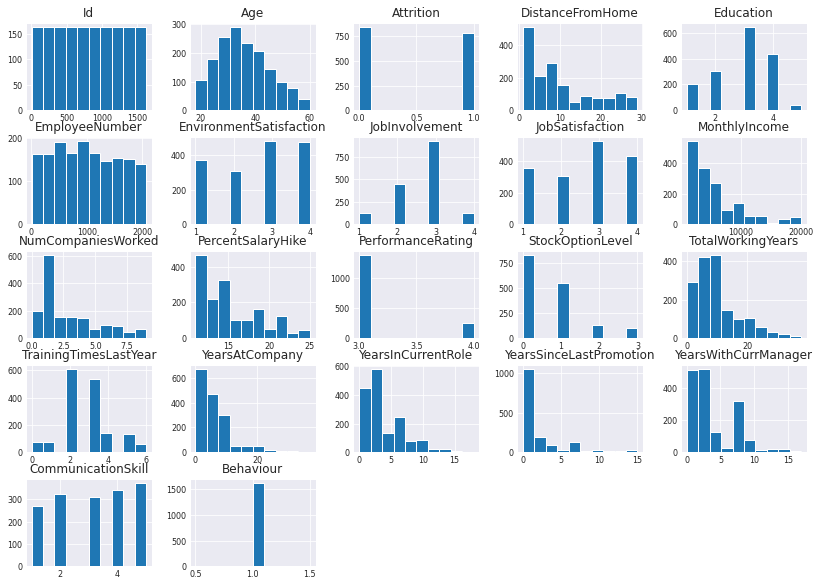

In [100]:
df[numerical_columns_list].hist(figsize=(14,10),xlabelsize=8, ylabelsize=8);


As seen from thr above visualization, there is skewness in the data

# Bivariate Analysis

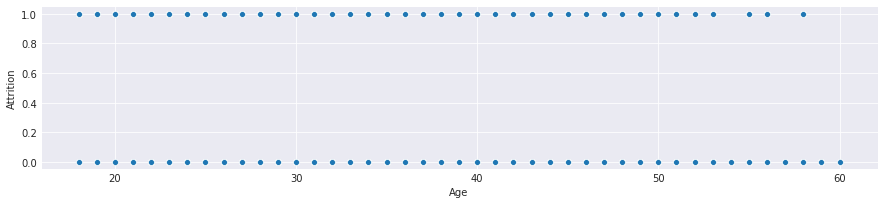

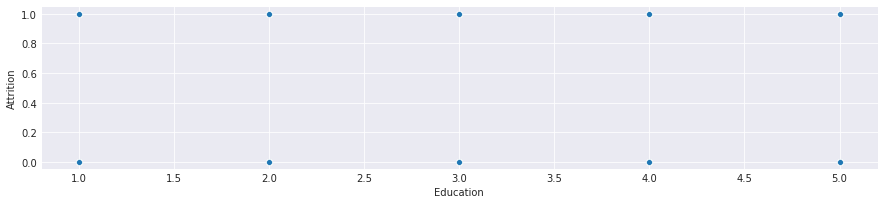

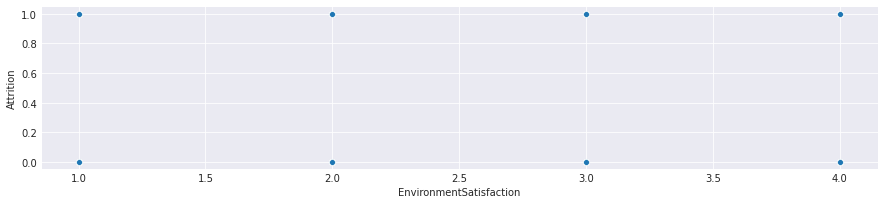

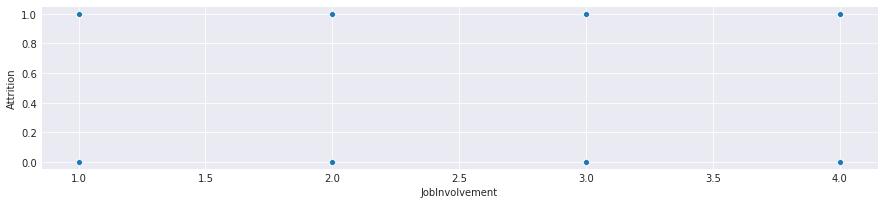

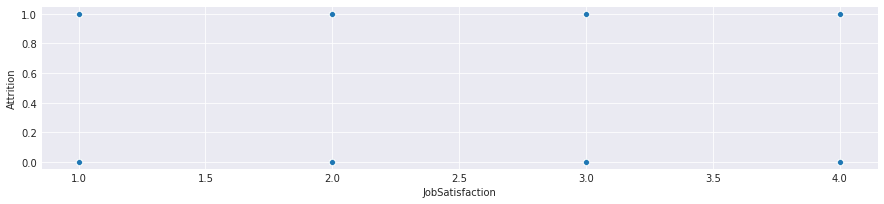

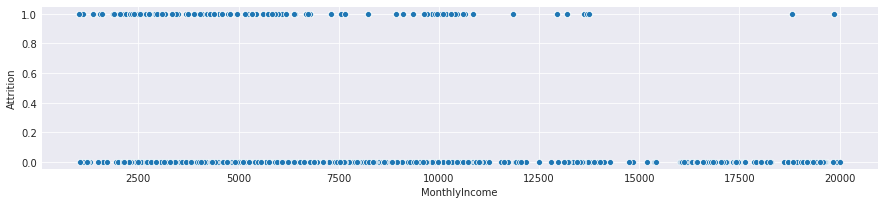

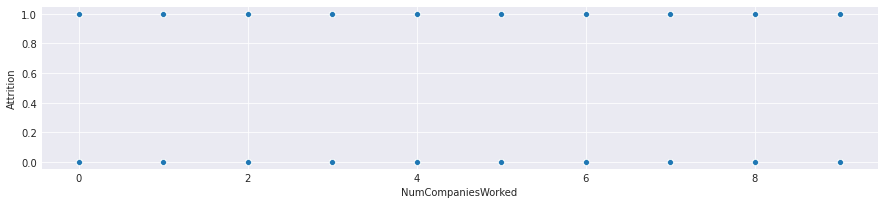

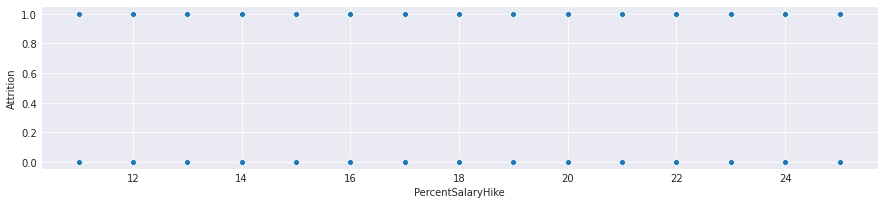

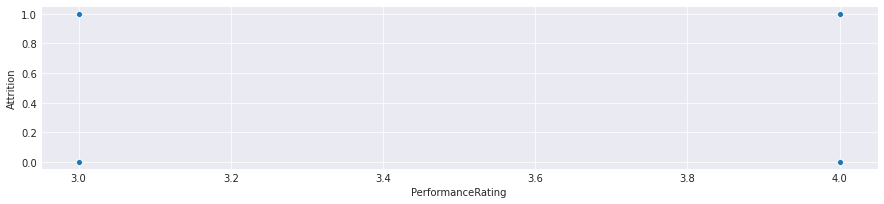

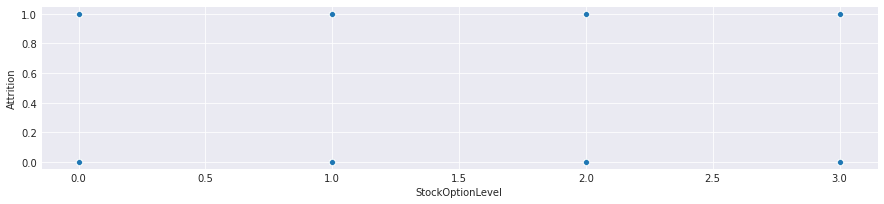

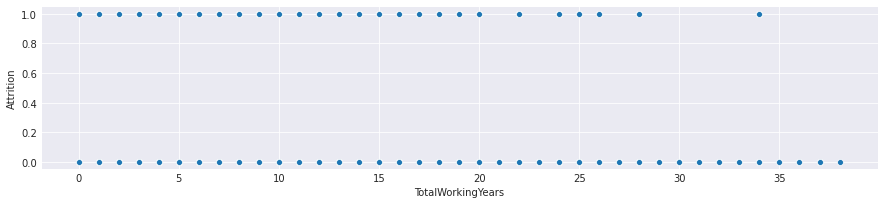

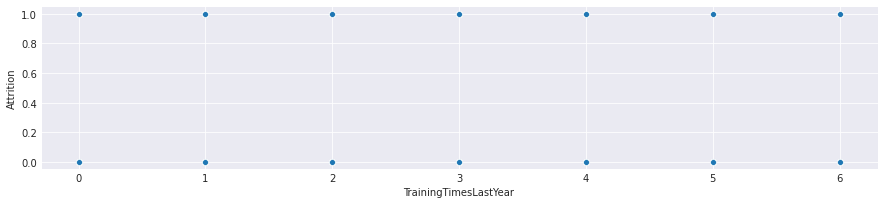

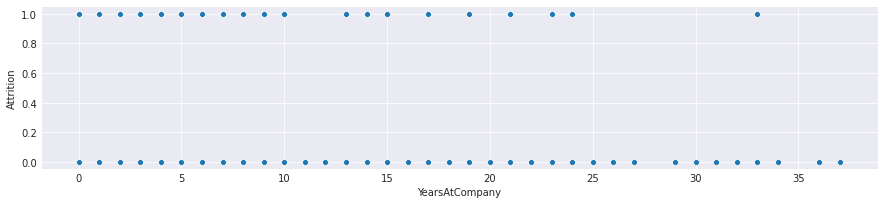

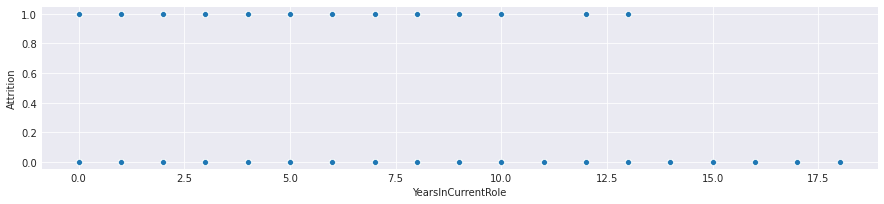

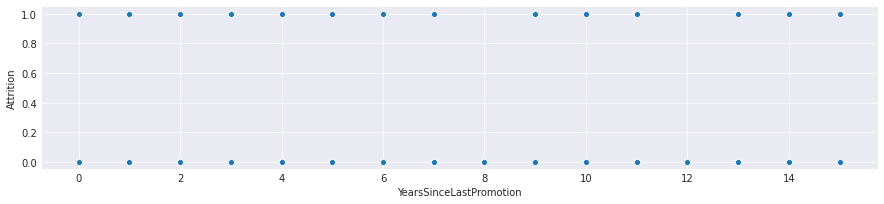

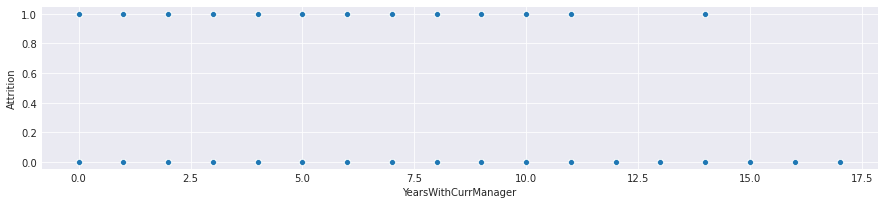

In [101]:
for col in numerical_columns_list:
    if col not in ['Attrition','Id']:
        plt.figure(figsize=(15,3))
        sns.scatterplot(x=col,y='Attrition',data=df)
        plt.show()


Here we can see some columns like MonthlyIncome, TotalWorkingYears , YearsAtCompany, YearsInCurrentRole and YearsWithCurrentManager have a rough threshold which divides the the two categories.



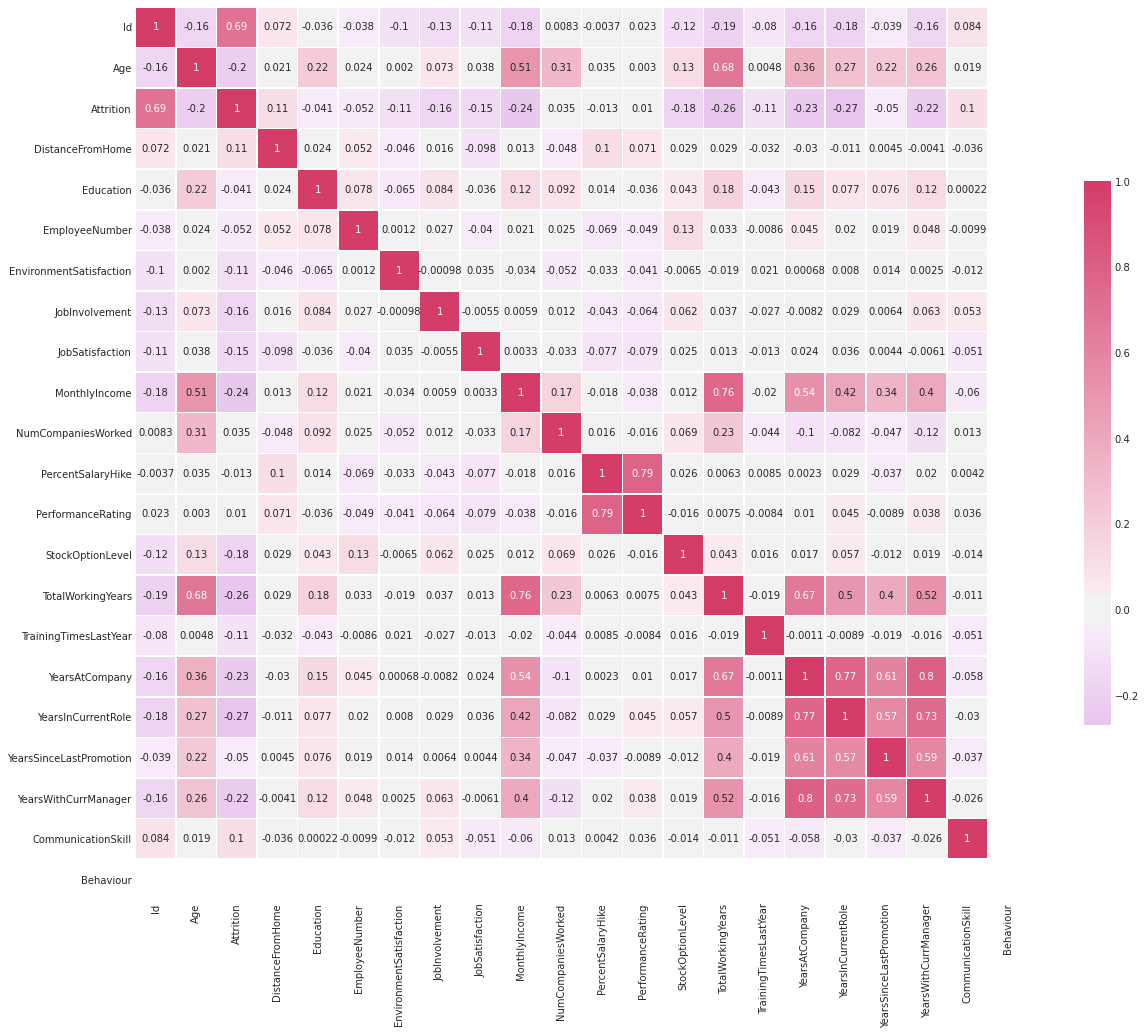

In [23]:
corr_matrix = df[numerical_columns_list].corr()
cmap = sns.diverging_palette(300, 0, as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()


As we can see from above correlation plot, some features have high corelation with other features and hardly any feature is linearly corelated with target 

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


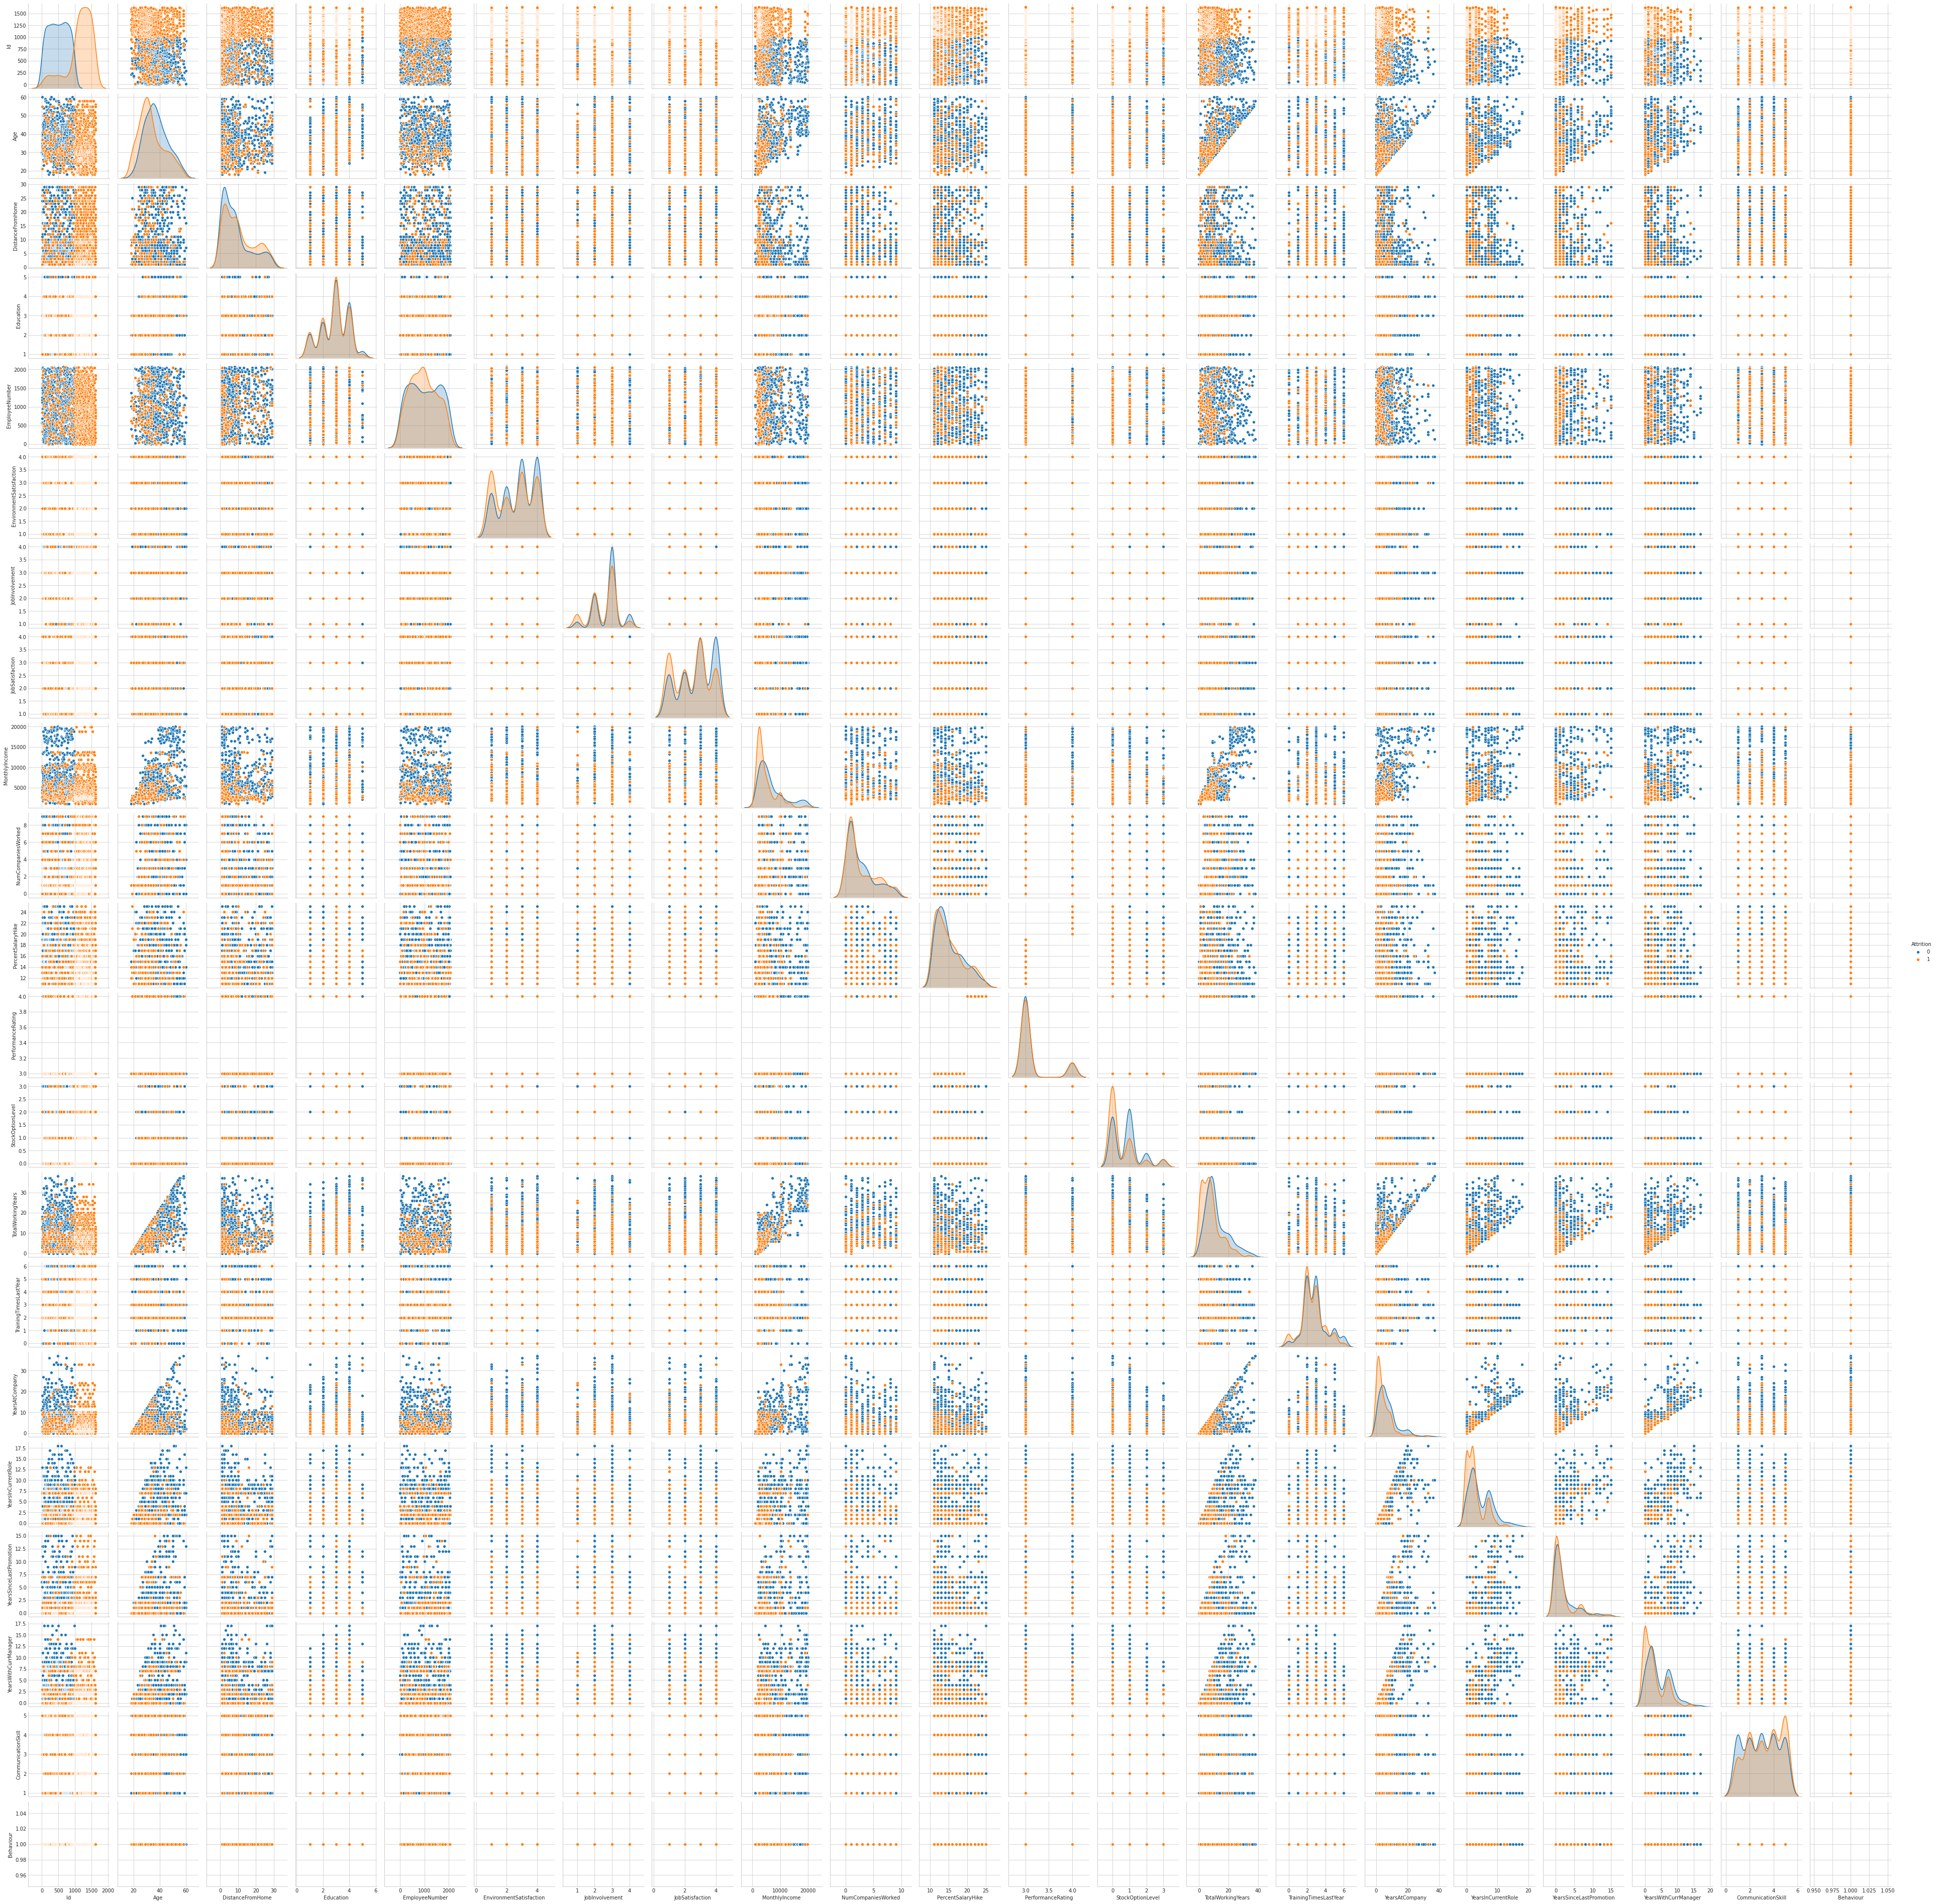

In [27]:
sns.pairplot(df[numerical_columns_list],hue='Attrition')

As  we can see from the above pairplot, many features have strong trend with each other.

Also distribution of each feature is not normal and has multiple peaks with in them.


In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chetanrane72/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chetanrane72/zerotopandas-course-project-starter


'https://jovian.ml/chetanrane72/zerotopandas-course-project-starter'

## Asking and Answering Questions


## Which age range has more Attrition rate

In [ ]:
# Let's first bin the age column into 3 categories, low age group, middle age group and high age group
#Let's first check m

In [31]:
print(df.Age.min())
print(df.Age.max())

print(np.split(np.arange(18,60),3))



18
60
[array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]), array([46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])]


In [17]:
df['age_group']=''
for index,row in df.iterrows():
    if row['Age']<=31:
        df.loc[index,'age_group']='low_age'
    elif row['Age']>31 and row['Age']<=45:
        df.loc[index,'age_group']='middle_age'
    else:
        df.loc[index,'age_group']='high_age'

In [18]:
df.groupby(['age_group','Attrition'])['Id'].count()

age_group   Attrition
high_age    0            162
            1            125
low_age     0            235
            1            395
middle_age  0            446
            1            265
Name: Id, dtype: int64

<AxesSubplot:xlabel='age_group'>

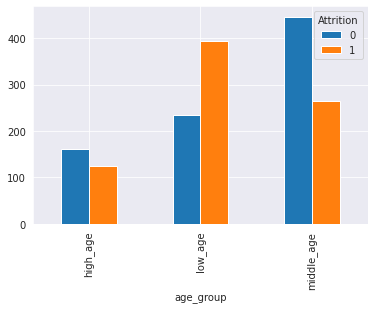

In [19]:
#Let's visualize the above output
pd.crosstab(df['age_group'],df['Attrition']).plot.bar() 

The  Employee with low_age group has higher attrition  value

## Does amount of travel in job affects the job satisfaction and can contribute to Attrition?

In [79]:
travel_df=df[df.Attrition==1]
travel_df.groupby(['JobSatisfaction','BusinessTravel'])['Id'].count()

JobSatisfaction  BusinessTravel   
1                Non-Travel            15
                 Travel_Frequently     60
                 Travel_Rarely        135
2                Non-Travel            15
                 Travel_Frequently     35
                 Travel_Rarely        105
3                Non-Travel             5
                 Travel_Frequently    115
                 Travel_Rarely        140
4                Travel_Frequently     45
                 Travel_Rarely        115
Name: Id, dtype: int64

In [104]:
#pd.crosstab(df['age_group'],df['Attrition']).plot.bar(hue='Attrition') 
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
pd.crosstab(travel_df['JobSatisfaction'],travel_df['BusinessTravel']).plot.bar()

<AxesSubplot:xlabel='JobSatisfaction'>

<Figure size 1440x1440 with 0 Axes>

As we can observe that the Employee who have more travels and have less job satisfaction are more likely to Attrite

## Is percentage salary hike an important factor for Attrition?

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='PercentSalaryHike'>

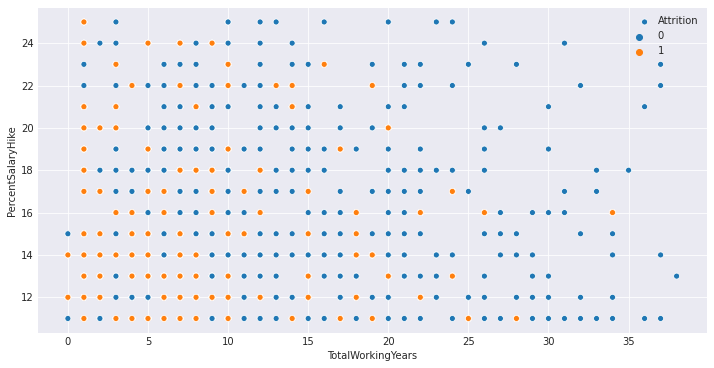

In [158]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,y='PercentSalaryHike',x='TotalWorkingYears',hue='Attrition')

In [115]:
sns.lineplot(df['PercentSalaryHike'],df['TotalWorkingYears'],hue=df['Attrition'])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='TotalWorkingYears'>

From the above graphs we can infer that percentage salary hike is am important factor for Attrition.
Employee with low percentage salary hike have more probability value for Attrition

## Does  year(Total,CuurentRole etc) affects the Attrition

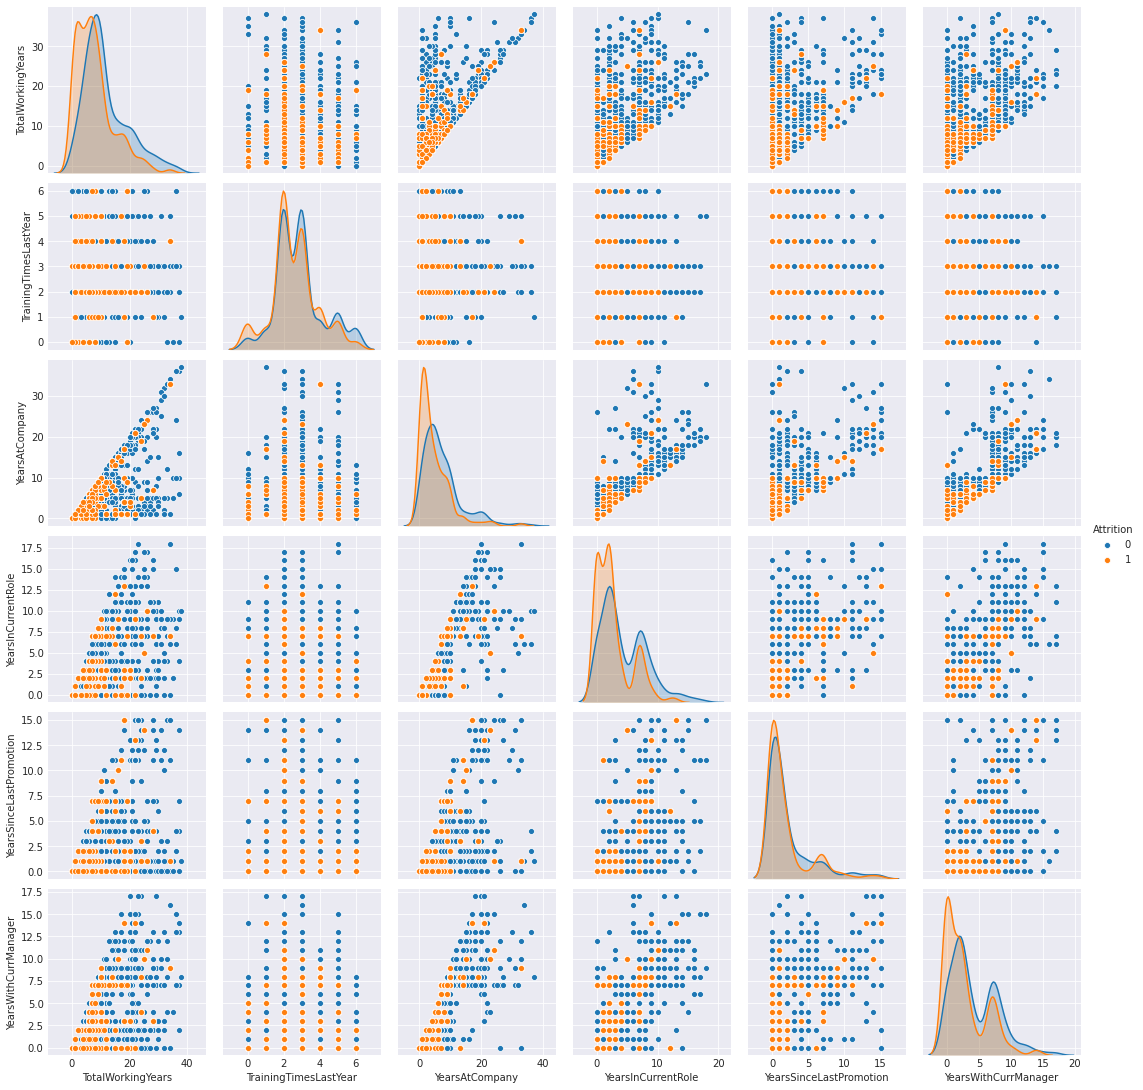

In [128]:
years_columns=['TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']
sns.pairplot(df[years_columns],hue='Attrition')


The ditribution is more clear and we can infer that,
Employee having less 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager' are more likely to Attrite

In [131]:
df.groupby(['Gender','MaritalStatus'])['Attrition'].count()

Gender  MaritalStatus
Female  Divorced         114
        Married          252
        Single           266
Male    Divorced         203
        Married          429
        Single           364
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='MaritalStatus'>

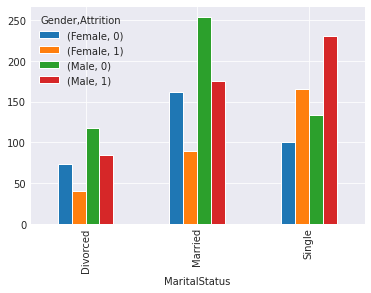

In [145]:
pd.pivot_table(index='MaritalStatus',columns=['Gender','Attrition'],values='Id',data=df,aggfunc='count').plot.bar()

In [147]:
df=pd.pivot_table(index='MaritalStatus',columns=['Gender','Attrition'],values='Id',data=df,aggfunc='count')

In [149]:
df

Gender        Female      Male     
Attrition          0    1    0    1
MaritalStatus                      
Divorced          74   40  118   85
Married          162   90  254  175
Single           101  165  134  230

## Does Marital Status and Gender affects the Attrition

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x1440 with 0 Axes>

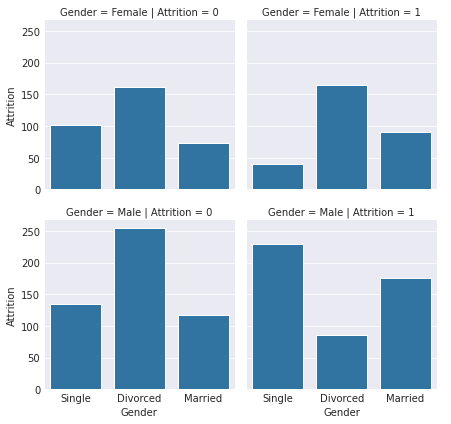

In [169]:
plt.figure(figsize=(20,20))
g=sns.FacetGrid(df,row='Gender',col='Attrition')
g.map(sns.countplot, "MaritalStatus")
g.set_axis_labels("Gender", "Attrition")
g.add_legend()


Single Males and Divorces Females are more likely to Attrite

## Employee from which department have higher attrition probability?

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2160x2160 with 0 Axes>

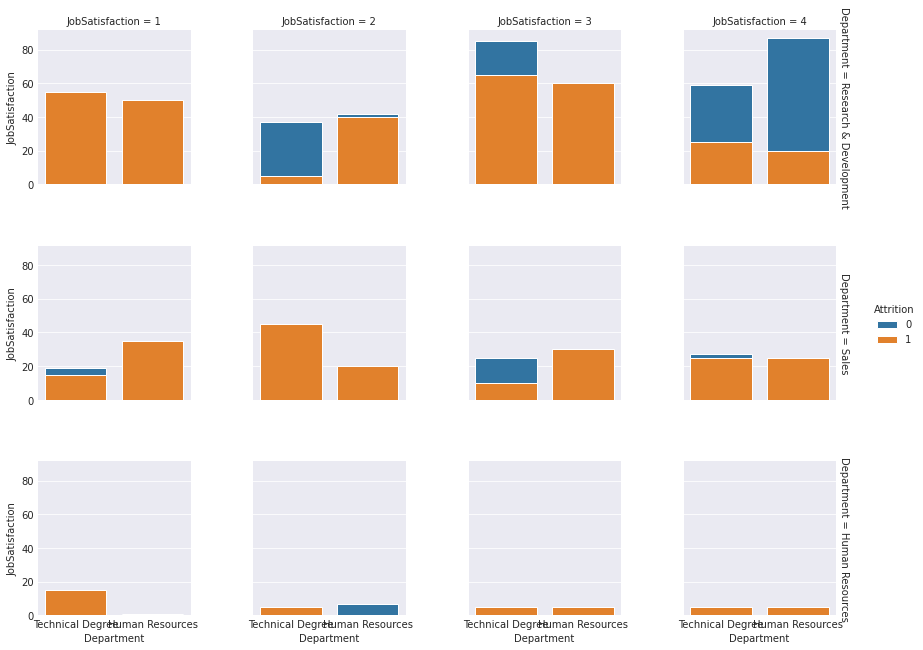

In [192]:
plt.figure(figsize=(30,30))
g=sns.FacetGrid(df,row='Department',col='JobSatisfaction',hue='Attrition',margin_titles=True)
g.map(sns.countplot, 'EducationField')
g.set_axis_labels("Department", "JobSatisfaction")
g.add_legend()
plt.subplots_adjust(hspace=0.4, wspace=0.4)



Employee from Research Developement Department having low job satisfaction have high probability of Attrition.

Emmployee from HR department also have high probability of Attrition.


## How overtime effects the employee attrition probabiltiy value

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2160x2160 with 0 Axes>

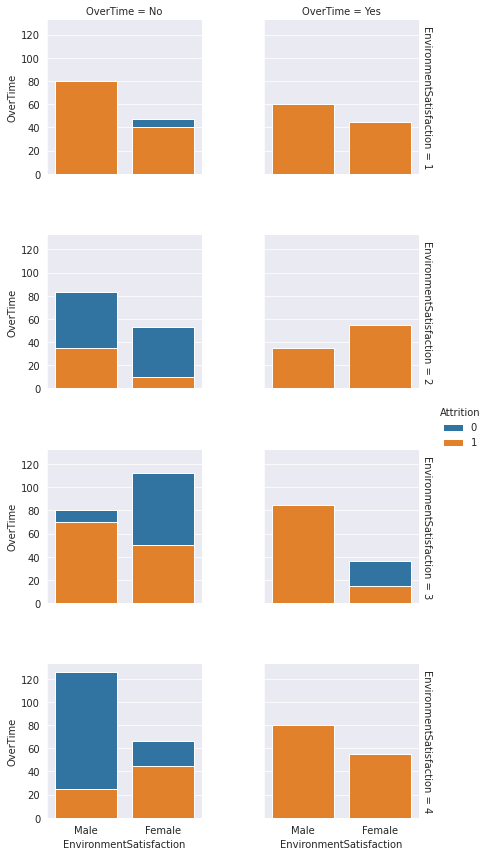

In [11]:
plt.figure(figsize=(30,30))
g=sns.FacetGrid(df,row='EnvironmentSatisfaction',col='OverTime',hue='Attrition',margin_titles=True)
g.map(sns.countplot, 'Gender')
g.set_axis_labels("EnvironmentSatisfaction", "OverTime")
g.add_legend()
plt.subplots_adjust(hspace=0.4, wspace=0.4)



<AxesSubplot:xlabel='Attrition'>

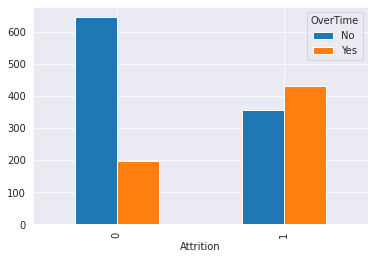

In [23]:
pd.crosstab(df['Attrition'],df['OverTime']).plot.bar()


Over time is a curcial factor which contributes to employee attrition.
As we can see under over time yes column,  Even if environment satisfcation is more, employee tends to leave the company if subjected to overtime work.

## Inferences and Conclusion

Some interesting observations from the visualizations

- The proportion of values in categorical variables are not equal.
- Single Employees have higher attrition value.
- Employees in the age group of 32-45 have higher attrition probability
- The Employees who experience business travel and have less job satisfaction pointer are more likely to leave company
- The employee from Sales, Laboratory and Research department have higher attrition probability
- Hardly any feature strongly  classifies the Target variable
- Employees subjected to overtime have higher attrition value.
- Percentage salary hike is also an important factor. Less the hike higher is the probability of employee attrition.



## References and Future Work


- https://matplotlib.org/3.1.1/tutorials/index.html
- https://seaborn.pydata.org/tutorial.html

### Future Work

- Highly corelated feature to be eliminated using  feature engineering technique to create new and strong feature variable
- Feature Engineering will  help to drive good features for better classification
- Data to be Normalized